#Team 1 - Activity August 1 2022

###Team Members 
1. Indu George
2. Mrudula M
3. Rashmi Ramakrishnan
4. Sandhya P

In [1]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
train=pd.read_csv('train.csv')
train.head()

,date,hour,demand
0,2018-08-18,9,91
1,2018-08-18,10,21
2,2018-08-18,13,23
3,2018-08-18,14,104
4,2018-08-18,15,81


In [4]:
test=pd.read_csv('test.csv')
test.head()

,date,hour
0,2021-03-01,0
1,2021-03-01,1
2,2021-03-01,2
3,2021-03-01,3
4,2021-03-01,5


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18247 entries, 0 to 18246
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    18247 non-null  object
 1   hour    18247 non-null  int64 
 2   demand  18247 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 427.8+ KB


In [6]:
train.shape

(18247, 3)

In [7]:
train['date']= pd.to_datetime(train['date'],format='%Y-%m-%d')
test['date']= pd.to_datetime(test['date'],format='%Y-%m-%d')

In [8]:
#splitting the date column into day,month & year
train['year']= train['date'].dt.year
train['month']= train['date'].dt.month
train['day']= train['date'].dt.day

test['year']= train['date'].dt.year
test['month']= train['date'].dt.month
test['day']= train['date'].dt.day
    

In [9]:
train.head()

,date,hour,demand,year,month,day
0,2018-08-18,9,91,2018,8,18
1,2018-08-18,10,21,2018,8,18
2,2018-08-18,13,23,2018,8,18
3,2018-08-18,14,104,2018,8,18
4,2018-08-18,15,81,2018,8,18


In [10]:
test.head()

,date,hour,year,month,day
0,2021-03-01,0,2018,8,18
1,2021-03-01,1,2018,8,18
2,2021-03-01,2,2018,8,18
3,2021-03-01,3,2018,8,18
4,2021-03-01,5,2018,8,18


##Feature Engineering

In [11]:
#introducing the column weekday
train['weekday'] = train['date'].apply(lambda x: x.weekday())
test['weekday'] = train['date'].apply(lambda x: x.weekday())

In [12]:
train.head()

,date,hour,demand,year,month,day,weekday
0,2018-08-18,9,91,2018,8,18,5
1,2018-08-18,10,21,2018,8,18,5
2,2018-08-18,13,23,2018,8,18,5
3,2018-08-18,14,104,2018,8,18,5
4,2018-08-18,15,81,2018,8,18,5


In [13]:
#introducing the column weekend
train['isWeekend'] = train['weekday'].apply(lambda x:1 if x>4 else 0)
test['isWeekend'] = test['weekday'].apply(lambda x:1 if x>4 else 0)

In [14]:
#adding the column quarter according to the financial year division
def quarters(n):
    if n in range(4,7):
        return 'Q1'
    elif n in range(7,10):
        return 'Q2'
    elif n in range(10,12) or n ==12 :
        return 'Q3'
    elif n in range(1,4):
        return 'Q4'

In [15]:
train['Quarter'] = train['month'].apply(quarters)
test['Quarter'] = test['month'].apply(quarters)

In [16]:
#function to identify the timing of the day
def timeOfDay(n):
    if n in range(0,6):
        return 'Night'
    elif n in range(6,12):
        return 'Morning'
    elif n in range(12,18):
        return 'Afternoon'
    elif n in range(18,23) or n == 23:
        return 'Evening'
    

In [17]:
train['typeOfDay'] = train['hour'].apply(lambda x: timeOfDay(x))
test['typeOfDay'] = test['hour'].apply(lambda x: timeOfDay(x))

In [18]:
#function for converting the months to seasons
def monthToSeasons(x):
    if x in[9,10,11]:
        return 'Autumn'
    elif x in [12,1,2]:
        return 'Winter'
    elif x in [3,4,5]:
        return 'Spring'
    elif x in [6,7,8]:
        return 'Summer'

In [19]:
train['Season'] = train['month'].apply(monthToSeasons)
test['Season'] = test['month'].apply(monthToSeasons)

In [20]:
train.head()

,date,hour,demand,year,month,day,weekday,isWeekend,Quarter,typeOfDay,Season
0,2018-08-18,9,91,2018,8,18,5,1,Q2,Morning,Summer
1,2018-08-18,10,21,2018,8,18,5,1,Q2,Morning,Summer
2,2018-08-18,13,23,2018,8,18,5,1,Q2,Afternoon,Summer
3,2018-08-18,14,104,2018,8,18,5,1,Q2,Afternoon,Summer
4,2018-08-18,15,81,2018,8,18,5,1,Q2,Afternoon,Summer


In [21]:
test.head()

,date,hour,year,month,day,weekday,isWeekend,Quarter,typeOfDay,Season
0,2021-03-01,0,2018,8,18,5,1,Q2,Night,Summer
1,2021-03-01,1,2018,8,18,5,1,Q2,Night,Summer
2,2021-03-01,2,2018,8,18,5,1,Q2,Night,Summer
3,2021-03-01,3,2018,8,18,5,1,Q2,Night,Summer
4,2021-03-01,5,2018,8,18,5,1,Q2,Night,Summer


In [22]:
#dropping the column date
train=train.drop(['date'],axis=1)
test=test.drop(['date'],axis=1)

In [23]:
train.columns

Index(['hour', 'demand', 'year', 'month', 'day', 'weekday', 'isWeekend',
       'Quarter', 'typeOfDay', 'Season'],
      dtype='object')

In [24]:
test.columns

Index(['hour', 'year', 'month', 'day', 'weekday', 'isWeekend', 'Quarter',
       'typeOfDay', 'Season'],
      dtype='object')

# EDA

[]

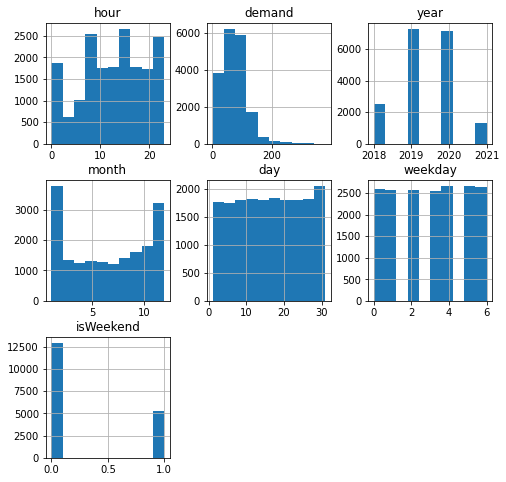

In [25]:
train.hist(figsize=(8,8))
plt.plot()

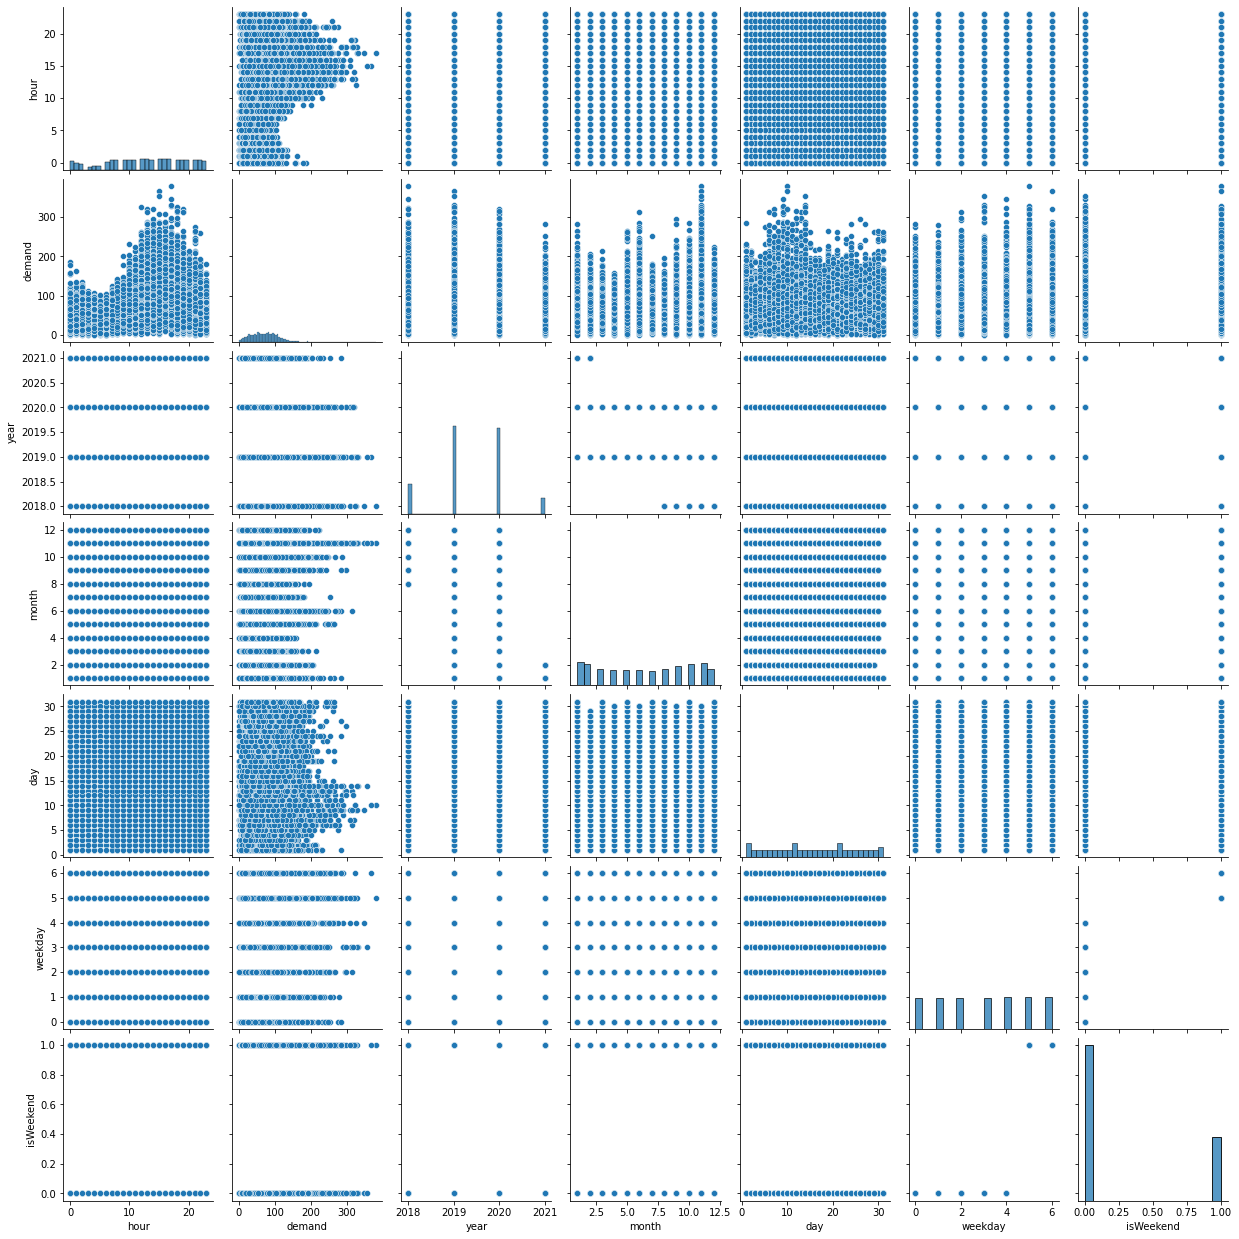

In [26]:
sns.pairplot(train)

(-1.1000942914596592,
 1.1000044900695076,
 -1.1272407823461028,
 1.1106972931684294)

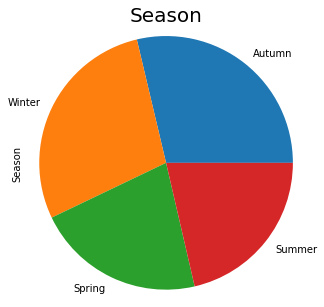

In [27]:
plt.figure(figsize=(5,5))
train['Season'].value_counts().plot(kind='pie')
plt.title("Season",size=20)
plt.axis('equal')

(-1.1084193089957362,
 1.1004009194759874,
 -1.1315313286291473,
 1.1115538779997485)

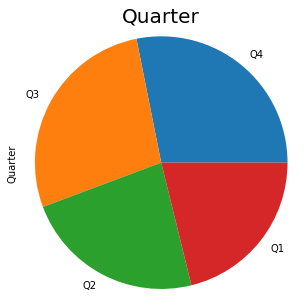

In [28]:
plt.figure(figsize=(5,5))
train['Quarter'].value_counts().plot(kind='pie')
plt.title("Quarter",size=20)
plt.axis('equal')

(-1.101696470079341,
 1.1000807842894924,
 -1.1109740676999122,
 1.111950302916158)

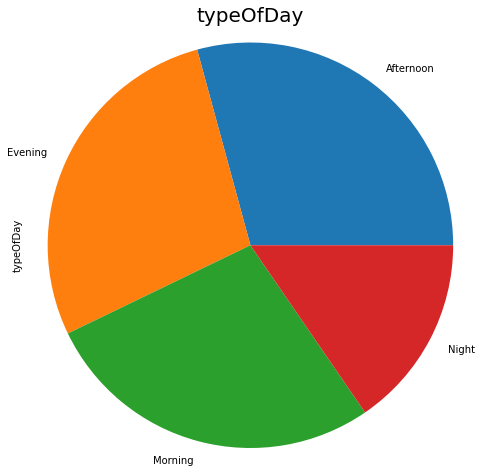

In [29]:
plt.figure(figsize=(8,8))
train['typeOfDay'].value_counts().plot(kind='pie')
plt.title("typeOfDay",size=20)
plt.axis('equal')

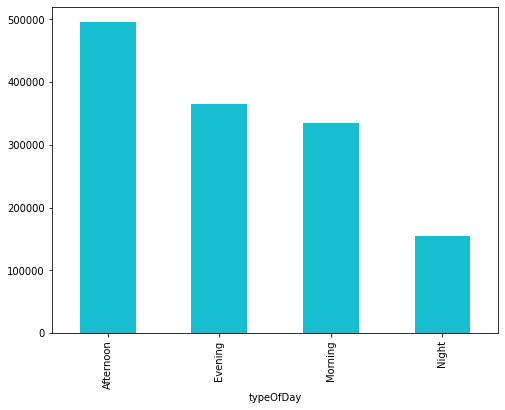

In [30]:
plt.figure(figsize=(8,6))
train.groupby('typeOfDay')['demand'].sum().plot(kind='bar',color='tab:cyan')

Highest demand is during night

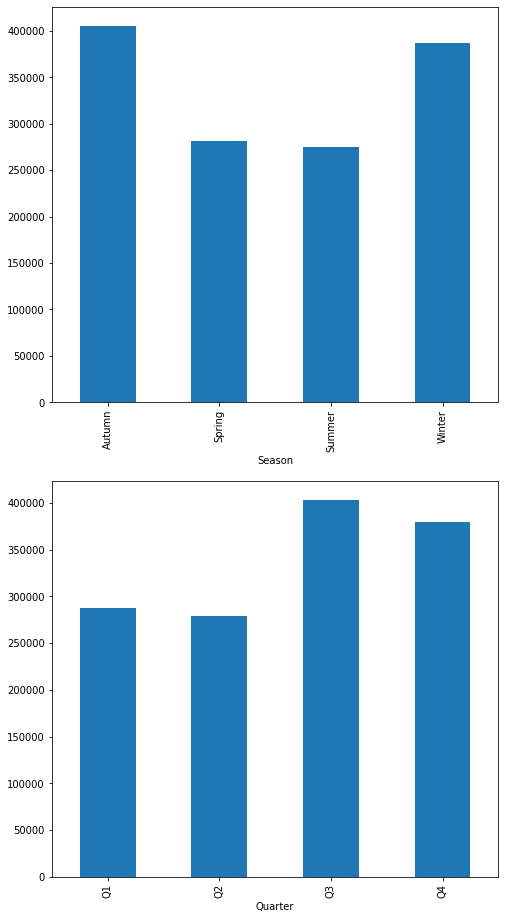

In [31]:
plt.figure(figsize=(8,16))
plt.subplot(2,1,1)
train.groupby('Season')['demand'].sum().plot(kind='bar')

plt.subplot(2,1,2)
train.groupby('Quarter')['demand'].sum().plot(kind='bar')


The car demand is high during autumn and the third quarter of the year

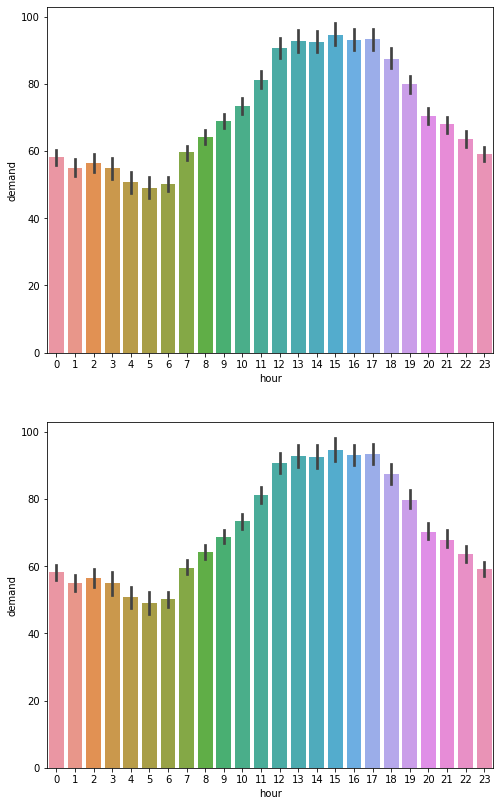

In [32]:
plt.figure(figsize=(8,14))
plt.subplot(2,1,1)
sns.barplot(x=train['hour'], y=train['demand'])

plt.subplot(2,1,2)
sns.barplot(x=train['hour'], y=train['demand'])



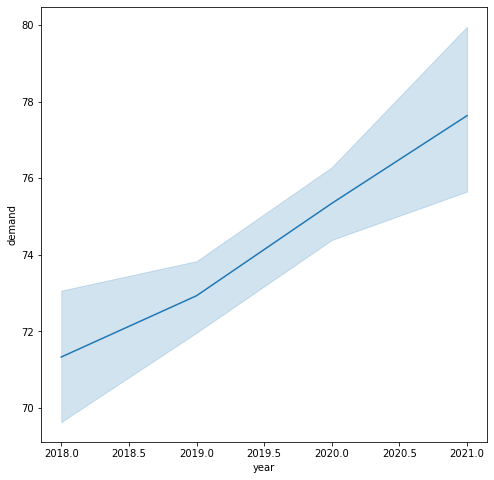

In [33]:
plt.figure(figsize=(8,8))
sns.lineplot(x='year', y='demand', data= train)

There is an uptrend in the car demand from 2018 to 2021

In [34]:
#checking for null values
train.isna().sum()

hour         0
demand       0
year         0
month        0
day          0
weekday      0
isWeekend    0
Quarter      0
typeOfDay    0
Season       0
dtype: int64

In [35]:
test.isna().sum()

hour         0
year         0
month        0
day          0
weekday      0
isWeekend    0
Quarter      0
typeOfDay    0
Season       0
dtype: int64

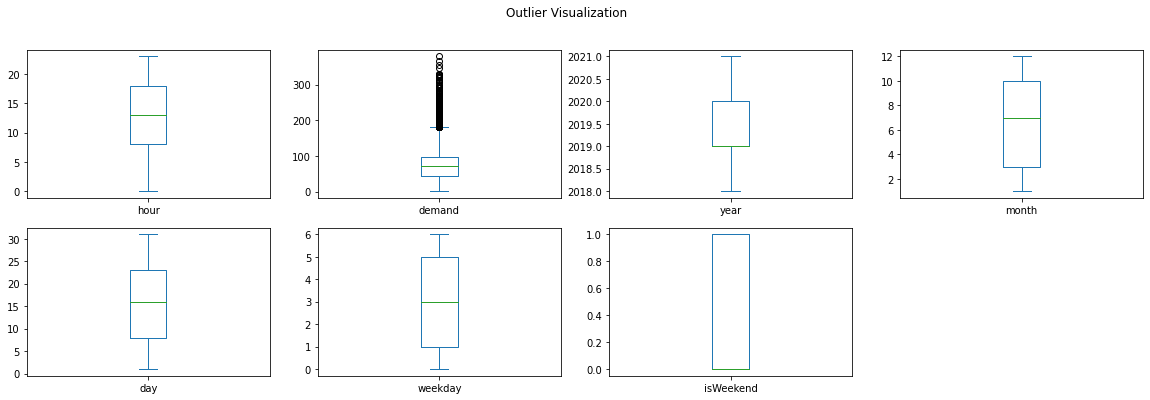

In [36]:
train.plot(kind='box',subplots=True,layout=(2,4),figsize=(20,6),title='Outlier Visualization')
plt.show()

In [37]:
train.dtypes

hour          int64
demand        int64
year          int64
month         int64
day           int64
weekday       int64
isWeekend     int64
Quarter      object
typeOfDay    object
Season       object
dtype: object

In [38]:
train[['Quarter','typeOfDay','Season']].nunique()

Quarter      4
typeOfDay    4
Season       4
dtype: int64

In [39]:
train['typeOfDay'].value_counts()

Afternoon    5334
Evening      5097
Morning      5000
Night        2816
Name: typeOfDay, dtype: int64

In [40]:
train['Season'].value_counts()

Autumn    5238
Winter    5183
Spring    3925
Summer    3901
Name: Season, dtype: int64

In [41]:
#converting categorical values into numerical values
train['Quarter'].replace(["Q1", "Q2", "Q3","Q4"], [1, 2, 3,4], inplace=True)
train['typeOfDay'].replace(["Morning", "Afternoon","Evening","Night"], [1, 2, 3,4], inplace=True)
train['Season'].replace(["Winter", "Spring", "Summer","Autumn"], [1, 2, 3,4], inplace=True)

test['Quarter'].replace(["Q1", "Q2", "Q3","Q4"], [1, 2, 3,4], inplace=True)
test['typeOfDay'].replace(["Morning", "Afternoon","Evening","Night"], [1, 2, 3,4], inplace=True)
test['Season'].replace(["Winter", "Spring", "Summer","Autumn"], [1, 2, 3,4], inplace=True)



In [42]:
train.head()

,hour,demand,year,month,day,weekday,isWeekend,Quarter,typeOfDay,Season
0,9,91,2018,8,18,5,1,2,1,3
1,10,21,2018,8,18,5,1,2,1,3
2,13,23,2018,8,18,5,1,2,2,3
3,14,104,2018,8,18,5,1,2,2,3
4,15,81,2018,8,18,5,1,2,2,3


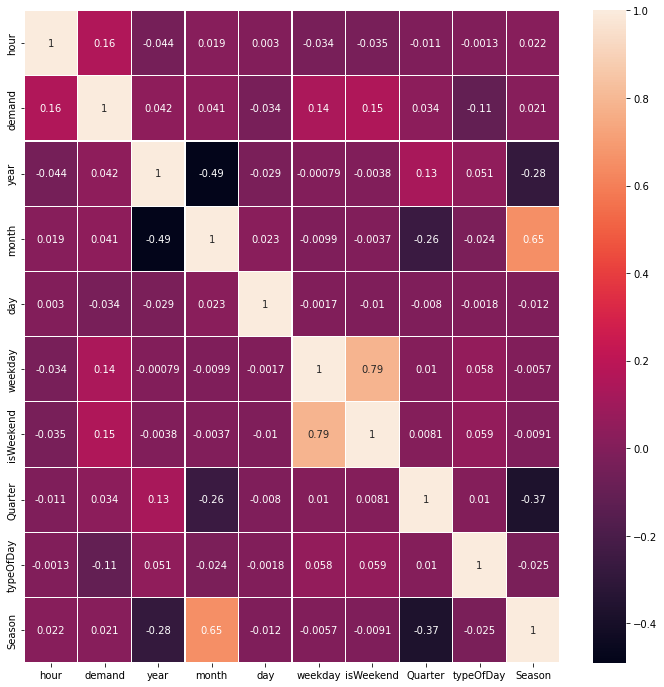

In [43]:
correlation = train.corr()
plt.figure(figsize=(12,12))
sns.heatmap(correlation, annot=True, vmin=-0.49, vmax= 1,linewidths=0.2)

In [44]:
#encoding the cyclic features
train['hour_sin'] = np.sin(train['hour']*(2.*np.pi/23))
train['hour_cos'] = np.cos(train['hour']*(2.*np.pi/23))
train['month_sin'] = np.sin(train['month']*(2.*np.pi/12))
train['month_cos'] = np.cos(train['month']*(2.*np.pi/12))
train['weekday'] = np.sin(train['weekday']*(2.*np.pi/6))
train['weekday'] = np.cos(train['weekday']*(2.*np.pi/6))

test['hour_sin'] = np.sin(test['hour']*(2.*np.pi/23))
test['hour_cos'] = np.cos(test['hour']*(2.*np.pi/23))
test['month_sin'] = np.sin(test['month']*(2.*np.pi/12))
test['month_cos'] = np.cos(test['month']*(2.*np.pi/12))
test['weekday'] = np.sin(test['weekday']*(2.*np.pi/6))
test['weekday'] = np.cos(test['weekday']*(2.*np.pi/6))

In [45]:
train=train.drop(['hour','month','weekday'],axis=1)
test=test.drop(['hour','month','weekday'],axis=1)

In [46]:
train.columns

Index(['demand', 'year', 'day', 'isWeekend', 'Quarter', 'typeOfDay', 'Season',
       'hour_sin', 'hour_cos', 'month_sin', 'month_cos'],
      dtype='object')

In [47]:
test.columns

Index(['year', 'day', 'isWeekend', 'Quarter', 'typeOfDay', 'Season',
       'hour_sin', 'hour_cos', 'month_sin', 'month_cos'],
      dtype='object')

In [48]:
#Splitting the dataset into X and Y
y = train['demand']
X = train.drop('demand',axis=1).copy()

In [49]:
X.describe()

,year,day,isWeekend,Quarter,typeOfDay,Season,hour_sin,hour_cos,month_sin,month_cos
count,18247.000000,18247.000000,18247.000000,18247.000000,18247.000000,18247.000000,18247.000000,18247.000000,1.824700e+04,1.824700e+04
mean,2019.396997,15.782430,0.290788,2.626898,2.313969,2.503864,-0.108939,-0.042373,-1.339525e-02,9.253697e-02
std,0.810979,8.772904,0.454138,1.104481,1.035442,1.179948,0.672928,0.730451,7.118374e-01,6.961317e-01
min,2018.000000,1.000000,0.000000,1.000000,1.000000,1.000000,-0.997669,-0.990686,-1.000000e+00,-1.000000e+00
25%,2019.000000,8.000000,0.000000,2.000000,1.000000,1.000000,-0.730836,-0.775711,-8.660254e-01,-5.000000e-01
50%,2019.000000,16.000000,0.000000,3.000000,2.000000,3.000000,-0.136167,-0.068242,-2.449294e-16,6.123234e-17
75%,2020.000000,23.000000,1.000000,4.000000,3.000000,4.000000,0.519584,0.682553,5.000000e-01,8.660254e-01
max,2021.000000,31.000000,1.000000,4.000000,4.000000,4.000000,0.997669,1.000000,1.000000e+00,1.000000e+00


In [50]:
#Checking the Variation Inflation Factor
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['Columns'] = X.columns
vif.sort_values('VIF', ascending = False)

,VIF,Columns
0,54.022332,year
3,21.518404,Quarter
4,19.487501,typeOfDay
5,17.885002,Season
1,4.249825,day
8,3.295041,month_sin
9,3.144664,month_cos
7,3.105857,hour_cos
2,1.416713,isWeekend
6,1.119151,hour_sin


In [51]:
train.corr()

,demand,year,day,isWeekend,Quarter,typeOfDay,Season,hour_sin,hour_cos,month_sin,month_cos
demand,1.000000,0.041879,-0.033689,0.150777,0.034120,-0.106815,0.021441,-0.272347,-0.204870,0.016366,0.080105
year,0.041879,1.000000,-0.028902,-0.003789,0.127072,0.050883,-0.281274,0.044539,0.036340,0.324273,-0.083389
day,-0.033689,-0.028902,1.000000,-0.010270,-0.008005,-0.001783,-0.012409,-0.003283,-0.002840,-0.019496,-0.002487
isWeekend,0.150777,-0.003789,-0.010270,1.000000,0.008051,0.059334,-0.009052,0.002986,0.034877,0.010517,0.004157
Quarter,0.034120,0.127072,-0.008005,0.008051,1.000000,0.010376,-0.367837,0.008813,0.012877,0.261089,0.791619
typeOfDay,-0.106815,0.050883,-0.001783,0.059334,0.010376,1.000000,-0.025239,-0.231905,0.816784,0.034032,0.003436
Season,0.021441,-0.281274,-0.012409,-0.009052,-0.367837,-0.025239,1.000000,-0.021463,-0.029153,-0.810523,-0.194390
hour_sin,-0.272347,0.044539,-0.003283,0.002986,0.008813,-0.231905,-0.021463,1.000000,-0.094751,0.035492,0.003813
hour_cos,-0.204870,0.036340,-0.002840,0.034877,0.012877,0.816784,-0.029153,-0.094751,1.000000,0.037766,0.008847
month_sin,0.016366,0.324273,-0.019496,0.010517,0.261089,0.034032,-0.810523,0.035492,0.037766,1.000000,0.011840


In [52]:
#Droppping the highest VIF columns
X.drop(['year'], axis=1, inplace=True)

In [53]:
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['Columns'] = X.columns
vif.sort_values('VIF', ascending = False)

,VIF,Columns
2,14.449321,Quarter
3,13.747004,typeOfDay
4,12.442954,Season
0,3.929832,day
7,3.003781,month_sin
8,2.769284,month_cos
6,2.470671,hour_cos
1,1.412161,isWeekend
5,1.102908,hour_sin


In [54]:
X.drop(['typeOfDay'], axis=1, inplace=True)

In [55]:
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['Columns'] = X.columns
vif.sort_values('VIF', ascending = False)

,VIF,Columns
2,11.412703,Quarter
3,10.080868,Season
0,3.794111,day
6,2.862887,month_sin
7,2.602754,month_cos
1,1.396623,isWeekend
4,1.036334,hour_sin
5,1.015385,hour_cos


In [56]:
X.drop(['Quarter'], axis=1, inplace=True)

In [57]:
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['Columns'] = X.columns
vif.sort_values('VIF', ascending = False)

,VIF,Columns
2,4.173736,Season
0,3.404479,day
5,1.491001,month_sin
1,1.381363,isWeekend
3,1.034794,hour_sin
6,1.025441,month_cos
4,1.014833,hour_cos


In [58]:
test.drop(['year','Quarter','typeOfDay'], axis=1, inplace=True)

#Modeling

###Linear Regression

In [59]:
#Model Building
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X.values, y, test_size=0.2, random_state=42)
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score as r2

1.Linear Regression

In [60]:
from sklearn.linear_model import LinearRegression

In [61]:
lr_model = LinearRegression()

In [62]:
lr_model.fit(X_train, y_train) 
lr_pred = lr_model.predict(X_test)

In [63]:
#rmse = np.sqrt(np.mean((y_test-lr_pred)**2))
#r_2 = 1 - (np.sum((y_test - lr_pred)**2) / np.sum((y_test - y_test.mean())**2))
#print("RMSE",rmse)
#print("R2",r_2)

In [64]:
print("MSE      :", mse(y_test,lr_pred))
print('R2 Score :',r2(y_test,lr_pred))

MSE      : 1388.3983327399437
R2 Score : 0.16626403150594737


####Applying on Test *data*

In [65]:
lr_test_pred = lr_model.predict(test)
lr_test_pred

array([58.26151536, 53.75454047, 50.60937863, ..., 78.52076522,
       72.36915815, 66.83463193])

###Random Forest

In [66]:
# importing Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor
#create instance
rf_reg = RandomForestRegressor(random_state=42,max_depth=16,n_estimators=500)

# fitting model
rf_model = rf_reg.fit(X_train,y_train)
# Predicting Model
rf_pred = rf_model.predict(X_test)
# Error Analysis
print('Mean Squared Error: ',mse(y_test,rf_pred))
print('R2 Score          : ',r2(y_test,rf_pred))

Mean Squared Error:  1321.849981082528
R2 Score          :  0.20622644943199264


In [67]:
#rmse = np.sqrt(np.mean((y_test-lr_pred)**2))
#r_2 = 1 - (np.sum((y_test - lr_pred)**2) / np.sum((y_test - y_test.mean())**2))
#print("RMSE",rmse)
#print("R2",r_2)

####Applying Random Forest on Test Data

In [68]:
rf_test_pred = rf_reg.predict(test)
rf_test_pred

array([25.93718932, 61.66331471, 37.14621795, ..., 38.25629944,
       36.89387625, 72.04779625])

###LGBM Regression

In [69]:
import lightgbm  as lgb
lgb_model=lgb.LGBMRegressor

####Spliting for LGBM

In [70]:
# compute 20% number of samples
X.shape[0]*0.2

3649.4

In [71]:
X_train = X.iloc[:-3600,:]
y_train = y.iloc[:-3600,]
X_val=X.iloc[-3600:,:]
y_val=y.iloc[-3600:,]

####Modeling LGBM

In [72]:
model=lgb.LGBMRegressor(n_estimators=3000,learning_rate=0.01)
model.fit(
               X_train,y_train,
               eval_metric='rmse',
               eval_set=[(X_val.values,y_val)],
          callbacks=[lgb.early_stopping(100)]
        );

[1]	valid_0's rmse: 45.5778	valid_0's l2: 2077.33
Training until validation scores don't improve for 100 rounds.
[2]	valid_0's rmse: 45.4605	valid_0's l2: 2066.66
[3]	valid_0's rmse: 45.3457	valid_0's l2: 2056.23
[4]	valid_0's rmse: 45.2233	valid_0's l2: 2045.14
[5]	valid_0's rmse: 45.1126	valid_0's l2: 2035.14
[6]	valid_0's rmse: 44.9944	valid_0's l2: 2024.5
[7]	valid_0's rmse: 44.8835	valid_0's l2: 2014.53
[8]	valid_0's rmse: 44.7747	valid_0's l2: 2004.77
[9]	valid_0's rmse: 44.6587	valid_0's l2: 1994.4
[10]	valid_0's rmse: 44.5574	valid_0's l2: 1985.36
[11]	valid_0's rmse: 44.4533	valid_0's l2: 1976.09
[12]	valid_0's rmse: 44.3517	valid_0's l2: 1967.08
[13]	valid_0's rmse: 44.2514	valid_0's l2: 1958.18
[14]	valid_0's rmse: 44.1532	valid_0's l2: 1949.51
[15]	valid_0's rmse: 44.0538	valid_0's l2: 1940.74
[16]	valid_0's rmse: 43.9536	valid_0's l2: 1931.92
[17]	valid_0's rmse: 43.8765	valid_0's l2: 1925.14
[18]	valid_0's rmse: 43.7886	valid_0's l2: 1917.44
[19]	valid_0's rmse: 43.7068	v

In [73]:
lgbm_pred = model.predict(X_test)
lgbm_pred

array([64.33339655, 86.00796926, 70.54654474, ..., 64.9448598 ,
       55.65724827, 57.47070359])

In [74]:
# Error Analysis
print('Mean Squared Error: ',mse(y_test,lgbm_pred))
print('R2 Score          : ',r2(y_test,lgbm_pred))

Mean Squared Error:  1090.195861177408
R2 Score          :  0.3453352105564623


#### Applying LGBM on Test data

In [75]:
predicted_test = model.predict(test)
predicted_test

array([53.68504846, 54.82833992, 54.82833992, ..., 58.52237756,
       55.93576749, 54.54405097])